<a href="https://colab.research.google.com/github/cshooon/SignSpeak/blob/main/SignSpeak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

In [ ]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/content/drive/MyDrive/data/asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)

<ipython-input-3-11edfdac76f8>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.empty((train_len,), dtype=np.int)


In [ ]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


In [ ]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


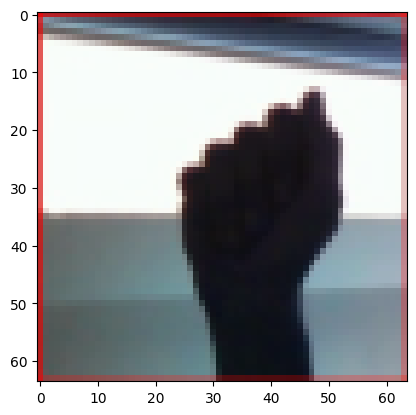

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
X_data = X_train
y_data = y_train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [ ]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50
952/952 - 283s - loss: 1.1019 - accuracy: 0.6734 - val_loss: 0.2877 - val_accuracy: 0.9036 - 283s/epoch - 298ms/step
Epoch 2/50
952/952 - 271s - loss: 0.1647 - accuracy: 0.9467 - val_loss: 0.0827 - val_accuracy: 0.9741 - 271s/epoch - 284ms/step
Epoch 3/50
952/952 - 271s - loss: 0.0777 - accuracy: 0.9758 - val_loss: 0.0688 - val_accuracy: 0.9780 - 271s/epoch - 285ms/step
Epoch 4/50
952/952 - 270s - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0550 - val_accuracy: 0.9840 - 270s/epoch - 283ms/step
Epoch 5/50
952/952 - 277s - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0373 - val_accuracy: 0.9892 - 277s/epoch - 291ms/step
Epoch 6/50
952/952 - 270s - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.0384 - val_accuracy: 0.9884 - 270s/epoch - 283ms/step
Epoch 7/50
952/952 - 270s - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0360 - val_accuracy: 0.9882 - 270s/epoch - 284ms/step
Epoch 8/50
952/952 - 269s - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0285 - val_accuracy: 0.9915 - 

In [ ]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.101856,0.673383,0.287651,0.903563
1,0.164700,0.946650,0.082698,0.974061
2,0.077733,0.975764,0.068766,0.978008
3,0.057729,0.981987,0.054986,0.984023
4,0.044741,0.985862,0.037339,0.989157
5,0.038174,0.988555,0.038382,0.988391
6,0.029911,0.990952,0.035995,0.988199
7,0.026838,0.992233,0.028542,0.991494
8,0.023351,0.992397,0.078615,0.979579
9,0.021181,0.993432,0.033888,0.989349


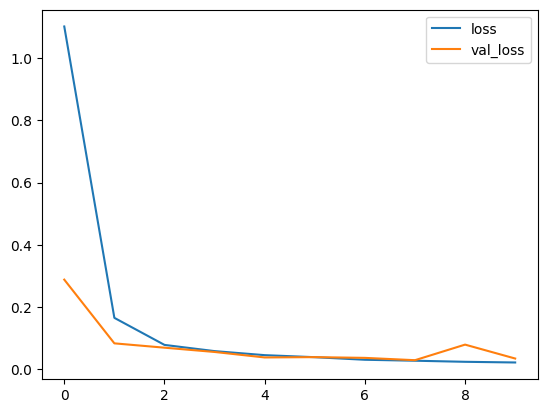

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

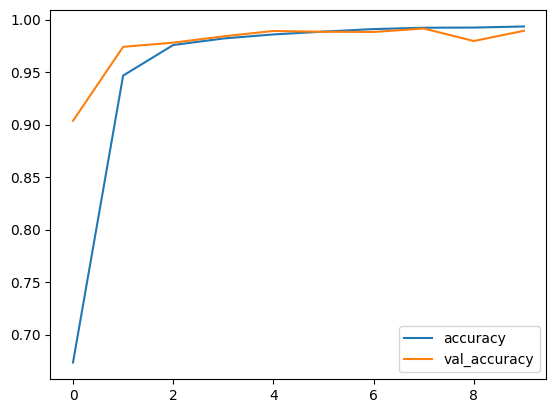

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.033887773752212524, 0.9893486499786377]

In [ ]:
predictions = model.predict(X_test)
predictions_classes = predictions.argmax(axis=-1)
print("Predictions done...")

816/816 [==============================] - 29s 35ms/step
Predictions done...


In [ ]:
print(classification_report(y_test, predictions_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2300
           1       1.00      0.99      0.99       900
           2       1.00      1.00      1.00       900
           3       1.00      1.00      1.00       900
           4       1.00      0.96      0.98       900
           5       1.00      1.00      1.00       856
           6       1.00      0.99      1.00       846
           7       0.99      1.00      0.99       900
           8       0.97      1.00      0.98       900
           9       1.00      0.99      0.99       896
          10       0.95      1.00      0.97       875
          11       1.00      1.00      1.00       891
          12       0.99      0.99      0.99       770
          13       0.99      1.00      0.99       896
          14       1.00      0.99      1.00       891
          15       0.99      1.00      1.00       892
          16       1.00      1.00      1.00       874
          17       0.92    

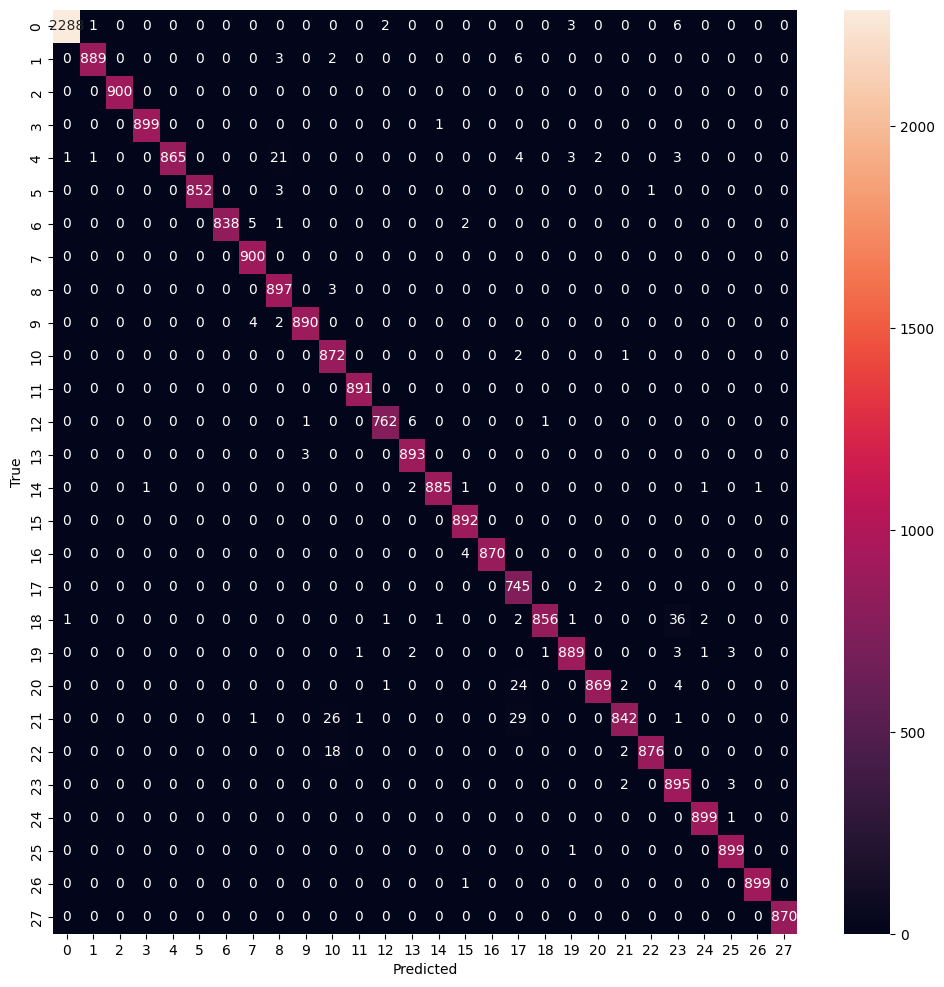

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test, predictions_classes), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
!ls

asl_alphabet_test  asl_alphabet_train


In [ ]:
# from keras.models import load_model
model.save('ASL.h5')
print("Model saved successfully...")

Model saved successfully...
